In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:21:49,670] A new study created in memory with name: no-name-3346596b-6f7f-41fb-acd1-144cd95797d6


[I 2025-04-27 11:21:49,702] Trial 0 finished with value: 0.9476027397260275 and parameters: {'C': 0.2512181809382923, 'kernel': 'sigmoid', 'gamma': 0.1972289584809995, 'max_iter': 1130}. Best is trial 0 with value: 0.9476027397260275.
[I 2025-04-27 11:21:49,720] Trial 1 finished with value: 0.953158295281583 and parameters: {'C': 9.623460279445728, 'kernel': 'poly', 'gamma': 0.09936143576453037, 'degree': 3, 'max_iter': 694}. Best is trial 1 with value: 0.953158295281583.
[I 2025-04-27 11:21:49,757] Trial 2 finished with value: 0.6630136986301369 and parameters: {'C': 0.0039751013458902825, 'kernel': 'rbf', 'gamma': 0.24838158834680854, 'max_iter': 7315}. Best is trial 1 with value: 0.953158295281583.
[I 2025-04-27 11:21:49,774] Trial 3 finished with value: 0.9695966514459664 and parameters: {'C': 0.2812799688654516, 'kernel': 'linear', 'max_iter': 987}. Best is trial 3 with value: 0.9695966514459664.
[I 2025-04-27 11:21:49,791] Trial 4 finished with value: 0.9474885844748859 and param

Best trial:
Accuracy: 0.9833713850837139
Best hyperparameters:  {'C': 1.226241946388296, 'kernel': 'linear', 'max_iter': 6214}


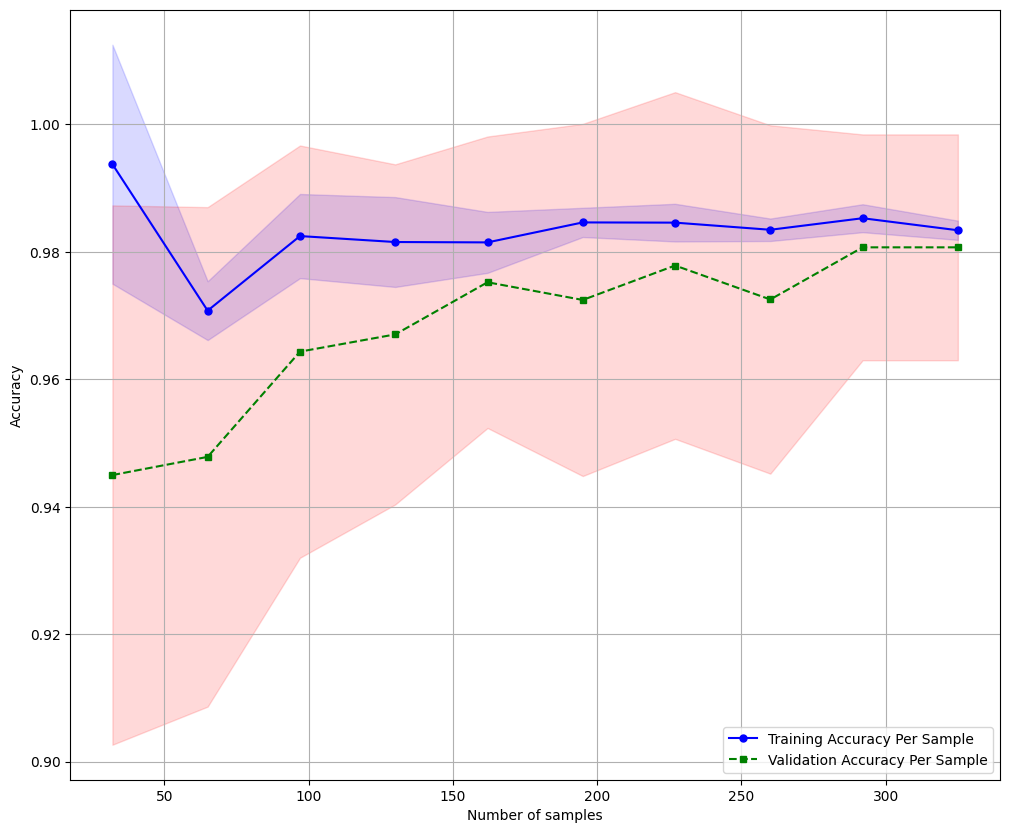

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9898


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)